In [3]:
import sys
import os
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

In [4]:
def connect():

    conn = None
    try:
        print('Connecting..')
        conn = psycopg2.connect(database="xdrDb", user="admin", password="admin", host="localhost", port="5433")
        
    except (Exception, psycopg2.DatabaseError) as error:
            print("Error: %s" % error)
            sys.exit(1)   
 
        
    print("All good, Connection successful!")
    return conn

In [3]:
conn = connect()

cursor = conn.cursor()

with open("../data/ddls.sql", "r") as sql_ddl:
    sql_commands = sql_ddl.read()
    
    

with open("../data/telecom.sql", "r") as input:
    cursor.copy_expert(sql= sql_commands, file=input)


conn.commit()


Connecting..
All good, Connection successful!


DuplicateTable: relation "xdr_data" already exists


In [5]:
def sql_to_dataframe(conn, query):
    cursor = conn.cursor()   
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    tuples_list = cursor.fetchall()   
    
    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()   
    return df

In [6]:
query = """ SELECT * FROM public.xdr_data  """

conn = connect()

df = sql_to_dataframe(conn, query)

conn.close()

Connecting..
All good, Connection successful!


In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [9]:
handset_counts = df['Handset Manufacturer'].value_counts()

In [10]:
handset_counts

Apple                               59565
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [11]:
handset_counts.head(10)

Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64

In [12]:
user_aggregations = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',                     
    'Social Media UL (Bytes)': 'sum',                      
    'Google DL (Bytes)': 'sum',                           
    'Google UL (Bytes)': 'sum',                            
    'Email DL (Bytes)': 'sum',                             
    'Email UL (Bytes)': 'sum',                            
    'Youtube DL (Bytes)': 'sum',                          
    'Youtube UL (Bytes)': 'sum',                          
    'Netflix DL (Bytes)': 'sum',                           
    'Netflix UL (Bytes)': 'sum',                          
    'Gaming DL (Bytes)': 'sum',                            
    'Gaming UL (Bytes)': 'sum',                            
    'Other DL (Bytes)': 'sum',                             
    'Other UL (Bytes)': 'sum' 
    })

In [13]:
user_aggregations

,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1,8810.0,6.879252e+08,26716429.0,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0
3.379000e+10,1,140988.0,4.445751e+08,35732243.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0
3.197021e+12,1,877385.0,1.948281e+08,37295915.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0


In [14]:
grouped_df = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
})

In [15]:
grouped_df

,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...
3.379000e+10,1,8810.0,6.879252e+08,26716429.0
3.379000e+10,1,140988.0,4.445751e+08,35732243.0
3.197021e+12,1,877385.0,1.948281e+08,37295915.0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
top_10_session_frequency = grouped_df.nlargest(10, 'Bearer Id')
top_10_session_duration = grouped_df.nlargest(10, 'Dur. (ms)')
top_10_total_traffic = grouped_df.nlargest(10, 'Total DL (Bytes)')

In [18]:
from sklearn.cluster import KMeans


scaler = StandardScaler()
normalized_engagement_metrics = scaler.fit_transform(grouped_df)

kmeans = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans.fit_predict(normalized_engagement_metrics)

grouped_df['Cluster'] = engagement_clusters

In [20]:
cluster_metrics = grouped_df.groupby('Cluster').agg({
    'Bearer Id': ['min', 'max', 'mean', 'sum'],              
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],             
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],      
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum']       
})


In [21]:
total_traffic_per_app = df.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Google DL (Bytes)', 
                                                              'Email DL (Bytes)', 'Youtube DL (Bytes)', 
                                                              'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                                                              'Other DL (Bytes)', 'Total DL (Bytes)']].sum()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

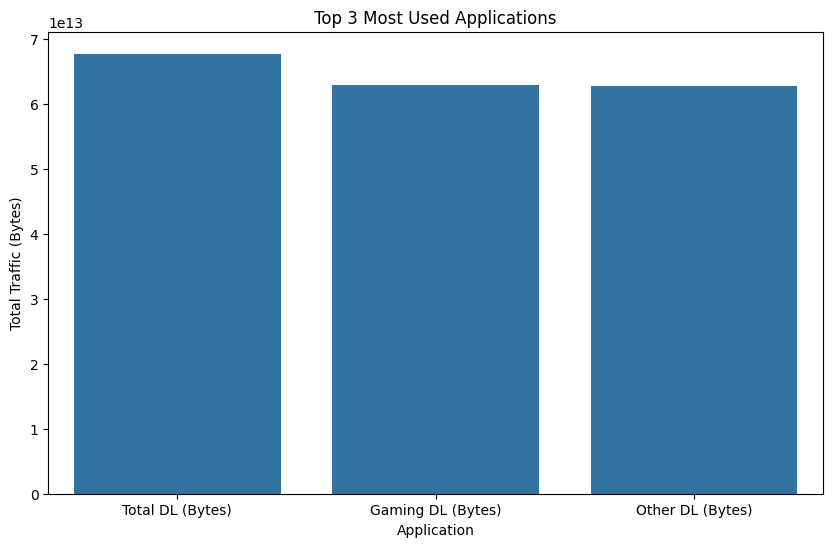

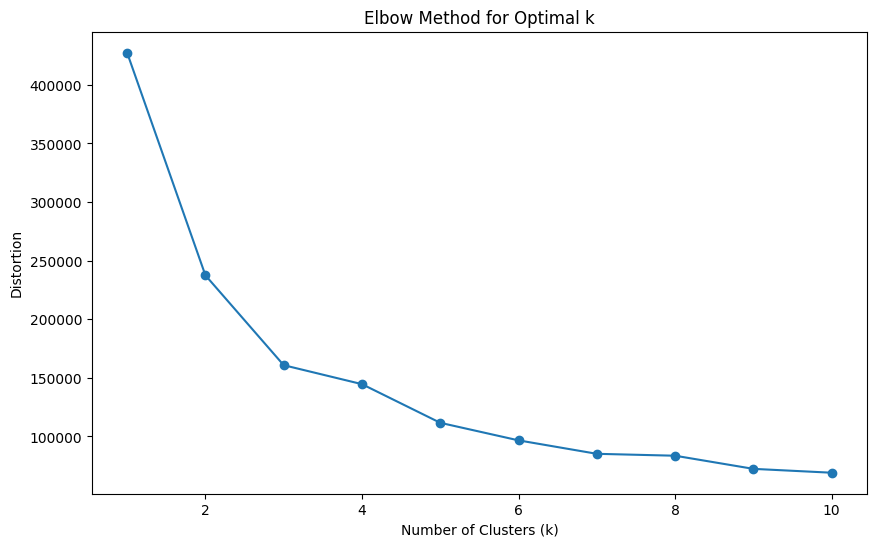

In [23]:
top_10_users_per_app = {}
for app in total_traffic_per_app.columns[:-1]:  # Exclude 'Total_DL' column
    top_10_users_per_app[app] = total_traffic_per_app.nlargest(10, app)

# Plot the top 3 most used applications
top_3_apps = total_traffic_per_app.sum().nlargest(3).index
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_apps, y=total_traffic_per_app.sum().nlargest(3).values)
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

# Determine optimized value of k for k-means clustering using the elbow method
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_engagement_metrics)
    distortions.append(kmeans.inertia_)

# Plot the elbow method curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [24]:
agg_data = df.groupby('MSISDN/Number').agg({
    'TCP_retransmission': lambda x: x.fillna(x.mean()),
    'RTT': lambda x: x.fillna(x.mean()),
    'Handset Type': lambda x: x.mode()[0],
    'Throughput': lambda x: x.fillna(x.mean())
})

KeyError: "Column(s) ['RTT', 'TCP_retransmission', 'Throughput'] do not exist"